In [48]:
import pandas as pd
import os

ds_path = "../data/raw/"
ds_name = "ml-latest-small"
ratings_file = os.path.join(ds_path, ds_name, "ratings.csv")
# df_ratings = pd.read_csv()
filtered_rows = []

user_id = 3

def get_user_ratios(user_id):
    # Read in chunks
    for chunk in pd.read_csv(ratings_file, chunksize=100000):
        filtered = chunk[chunk["userId"] == user_id]
        if not filtered.empty:
            filtered_rows.append(filtered)

    # Concatenate all matching chunks into one DataFrame
    df_user_ratings = pd.concat(filtered_rows, ignore_index=True)
    return df_user_ratings

df_user_ratings = get_user_ratios(user_id)
df_user_ratings

,userId,movieId,rating,timestamp
0,3,31,0.5,1306463578
1,3,527,0.5,1306464275
2,3,647,0.5,1306463619
3,3,688,0.5,1306464228
4,3,720,0.5,1306463595
5,3,849,5.0,1306463611
6,3,914,0.5,1306463567
7,3,1093,0.5,1306463627
8,3,1124,0.5,1306464216
9,3,1263,0.5,1306463569


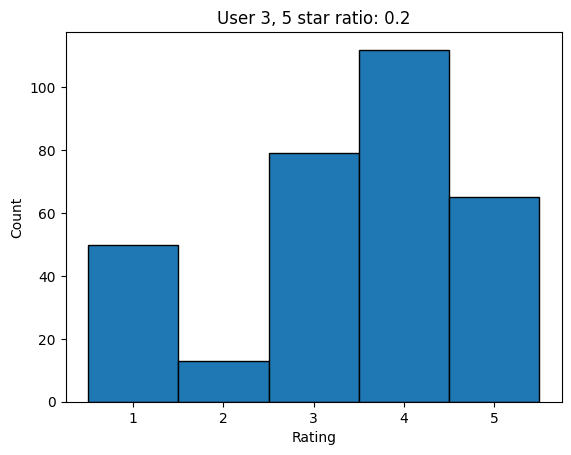

In [50]:
import matplotlib.pyplot as plt
import numpy as np

df_user_ratings = get_user_ratios(10)
fivestar_ratio = sum(df_user_ratings['rating']>4)/len(df_user_ratings['rating'])

plt.hist(df_user_ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title(f'User {user_id}, 5 star ratio: {fivestar_ratio:.2}')
plt.xticks([1, 2, 3, 4, 5])  # optional: clean x-axis ticks
plt.show()


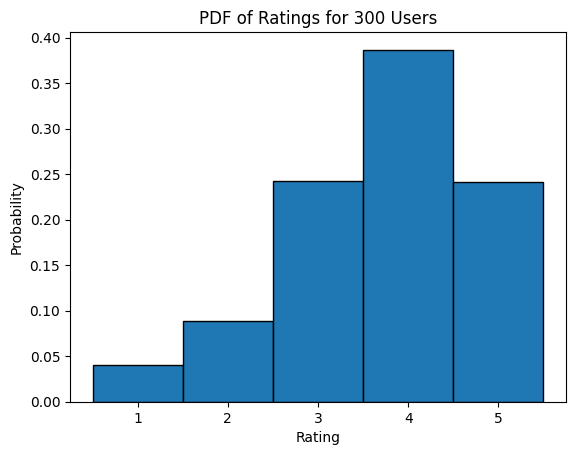

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the bin edges
bins = np.arange(0.5, 6, 1)  # [0.5, 1.5, ..., 5.5]
bin_counts = np.zeros(len(bins) - 1)
num_users = 300

for user_id in range(num_users):
    df_user_ratings = get_user_ratios(user_id)
    # fivestar_ratio = sum(df_user_ratings['rating']>4)/len(df_user_ratings['rating'])
    hist, _ = np.histogram(df_user_ratings['rating'], bins=bins)
    bin_counts += hist
    
# Normalize to get PDF
pdf = bin_counts / bin_counts.sum()


# Plot the PDF
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.bar(bin_centers, pdf, width=1.0, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Probability')
plt.title(f'PDF of Ratings for {num_users} Users')
plt.xticks([1, 2, 3, 4, 5])
plt.show()


In [67]:
print(f"<=2 stars ratio: {sum(pdf[:2]):.2}")
print(f"<=3 stars ratio: {sum(pdf[:3]):.2}")
print(f">=4 stars ratio: {sum(pdf[3:]):.2}")
print(f"5 stars ratio: {sum(pdf[4:]):.2}")

<=2 stars ratio: 0.13
<=3 stars ratio: 0.37
>=4 stars ratio: 0.63
5 stars ratio: 0.24


In [ ]:
import pandas as pd

movie_id_of_interest = 1
ds_path = "../data/raw/"
ds_name = "ml-latest"
genome_scores = os.path.join(ds_path, ds_name, "genome-scores.csv")

chunksize = 1128*10
matching_rows = []

# Read the CSV in chunks
for chunk in pd.read_csv(genome_scores, chunksize=chunksize):
    filtered = chunk[chunk['movieId'] == movie_id_of_interest]
    if not filtered.empty:
        matching_rows.append(filtered)

# Combine all rows for the movie
tag_scores = pd.concat(matching_rows, ignore_index=True)

# Optionally: just extract the relevance values
relevance_values = tag_scores['relevance'].values

In [69]:
ds_path = "../data/raw/"
ds_name = "ml-latest"

with open(os.path.join(ds_path, ds_name, "genome-scores.csv")) as f:
    num_rows = sum(1 for line in f) - 1  # subtract 1 for header
print(num_rows)

18472128


In [ ]:
18472128/1128

16376.0

In [ ]:
import csv

relevance = []

with open(os.path.join(ds_path, ds_name, "genome-scores.csv"), newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        
        if int(row["movieId"]) == 1:
            # process or collect relevant rows
            

16384

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

# Initialize storage for movie → tag → relevance
movie_tag_map = defaultdict(dict)
chunksize = 100_000  # adjust based on memory

csv_path = os.path.join(ds_path, ds_name, "genome-scores.csv")

# Step 1: Read and collect relevance scores into nested dict
for chunk in pd.read_csv(csv_path, chunksize=chunksize):
    for _, row in chunk.iterrows():
        movie_tag_map[row["movieId"]][row["tagId"]] = row["relevance"]

# Step 2: Convert to DataFrame
movie_features = pd.DataFrame.from_dict(movie_tag_map, orient="index").fillna(0)